Task:
- find a way to convert music in mp3 or wav format to spectrogram images that can be used by the ai model

In [1]:
%matplotlib inline 
# qt
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf

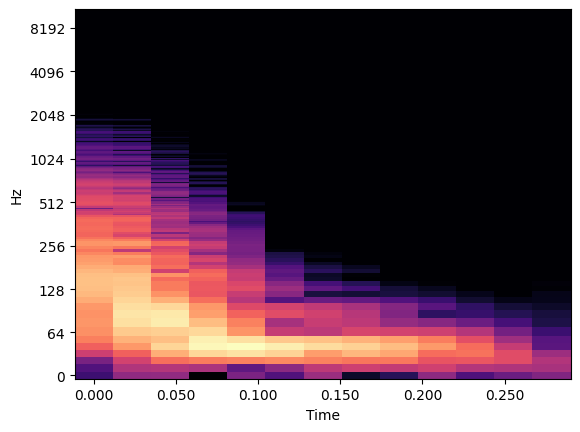

In [2]:
audio_name = '../kicks/kick1'
hop_length = 512 # 256 512 1024 2048 4096 8192 16384
window_size = 2048 
window = np.hanning(window_size)    

# load file
audio, sample_rate = librosa.load("{0}.wav".format(audio_name))

# convert to spectrogram
spectrum = librosa.stft(audio, n_fft=window_size, hop_length=hop_length, window=window)

spectrum_display = 2 * np.abs(spectrum) / np.sum(window)
librosa.display.specshow(librosa.amplitude_to_db(spectrum_display, ref=np.max), y_axis='log', x_axis='time')

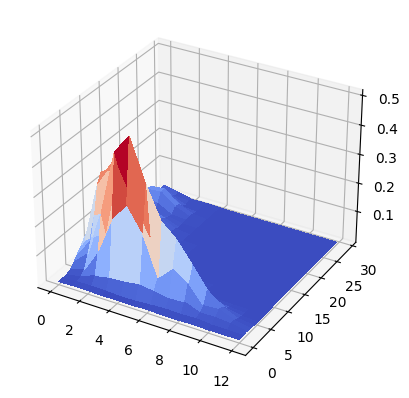

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# make data.
X = np.arange(len(spectrum_display[0,:]))
Y = np.arange(len(spectrum_display[:30,0]))
X, Y = np.meshgrid(X, Y)
Z = spectrum_display[Y,X]

# plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

In [4]:
# convert back
reconstructed_audio = librosa.istft(spectrum, n_fft=window_size, hop_length=hop_length, window=window)

# write to file
sf.write("{0}_recon.wav".format(audio_name), reconstructed_audio, sample_rate, 'PCM_24')

print ('Error: {0}'.format(sum(audio[:len(reconstructed_audio)] - reconstructed_audio)))

Error: 2.3060667899699183e-06
